# Exploration 1. 인공지능과 가위바위보 하기

#### step.1 데이터 준비하기
 : 구글의 teachable machine 사이트를 이용하여 가위, 바위, 보 각각 100장+a 의 이미지 생성하기

#### step.2 디렉토리 생성
 : 클라우드에 실습용 디렉토리를 만든 후, 업로드 및 압축해제하기

#### step.3 데이터 불러오기 + Resize 하기

In [1]:
import os
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

103  images to be resized.
103  images resized.
102  images to be resized.
102  images resized.
102  images to be resized.
102  images resized.


In [2]:
import numpy as np

def load_data(img_path, number_of_data=307):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 307 입니다.
x_train shape: (307, 28, 28, 3)
y_train shape: (307,)


라벨:  0


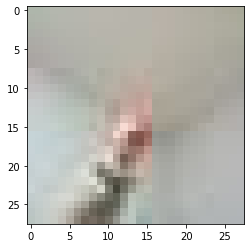

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#### step.4 딥러닝 네트워크 설계하기

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

#### step.5 모델 학습

In [5]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', #오류
             metrics=['accuracy']) #평가지표

model.fit(x_train_norm, y_train, epochs=10) #훈련부분

Epoch 1/10
10/10 [==============================] - 3s 12ms/step - loss: 1.0975 - accuracy: 0.3420
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0842 - accuracy: 0.4853
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.7557
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0437 - accuracy: 0.8632
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0084 - accuracy: 0.8827
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9497 - accuracy: 0.8241
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8562 - accuracy: 0.8436
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7150 - accuracy: 0.9283
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.9349
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.9381


#### step6. 테스트

In [6]:
# test image dataset 세팅

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_data(image_dir_path, 300)

x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
x_test_norm shape: (300, 28, 28, 3)
y_test shape: (300,)


In [7]:
# Test 진행

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.5263 - accuracy: 0.3333
test_loss: 1.5263251066207886 
test_accuracy: 0.3333333432674408


-----------------------------------------------------------------------------------------------------------

#### <회고>

첫번째 exploration! 노드를 편 당일에는 내용이 하나도 이해가 안됐는데, 일단 실습을 하면서 이해해보자(?)는 전략으로
하다보니, 조금씩 이해되었고 중간중간 퍼실님께서 알려주신 부분들로 이해를 했다고 생각했는데,
시간이 지난 후 다시 보니 다시 리셋되었다.. 하이퍼파라미터 값을 나름대로 조정해보며 실습을 했지만
정확히 이해한게 아니다보니,
학습과정에서의 정확도보다 현저히 떨어지는 테스트 accuracy를 어떻게 개선해야할지 아직 잘 모르겠다.
아마도 내가 스스로 촬영한 데이터와, 다른 분이 공유해주신 데이터가 매칭이 안된것으로 추측된다.
또한, 테스트를 할 때마다 정확도가 달라지는데 범위가 ~20 수준이라, 애초에 데이터 양도 많이 부족하고 신뢰도가 낮은것 같다.
이번 미니프로젝트는 더듬더듬 따라간 것에 의의를 둔다. 다음주부터 시작되는 머신러닝학습과정을 겸하며 조금 더 공부를 해봐야겠다.